#Como usar WikiData

Para acceder a la pagina en la que podemos empezar a escribir el "Script" para obtener la lista de lista de empresas en Mexico:

https://query.wikidata.org/



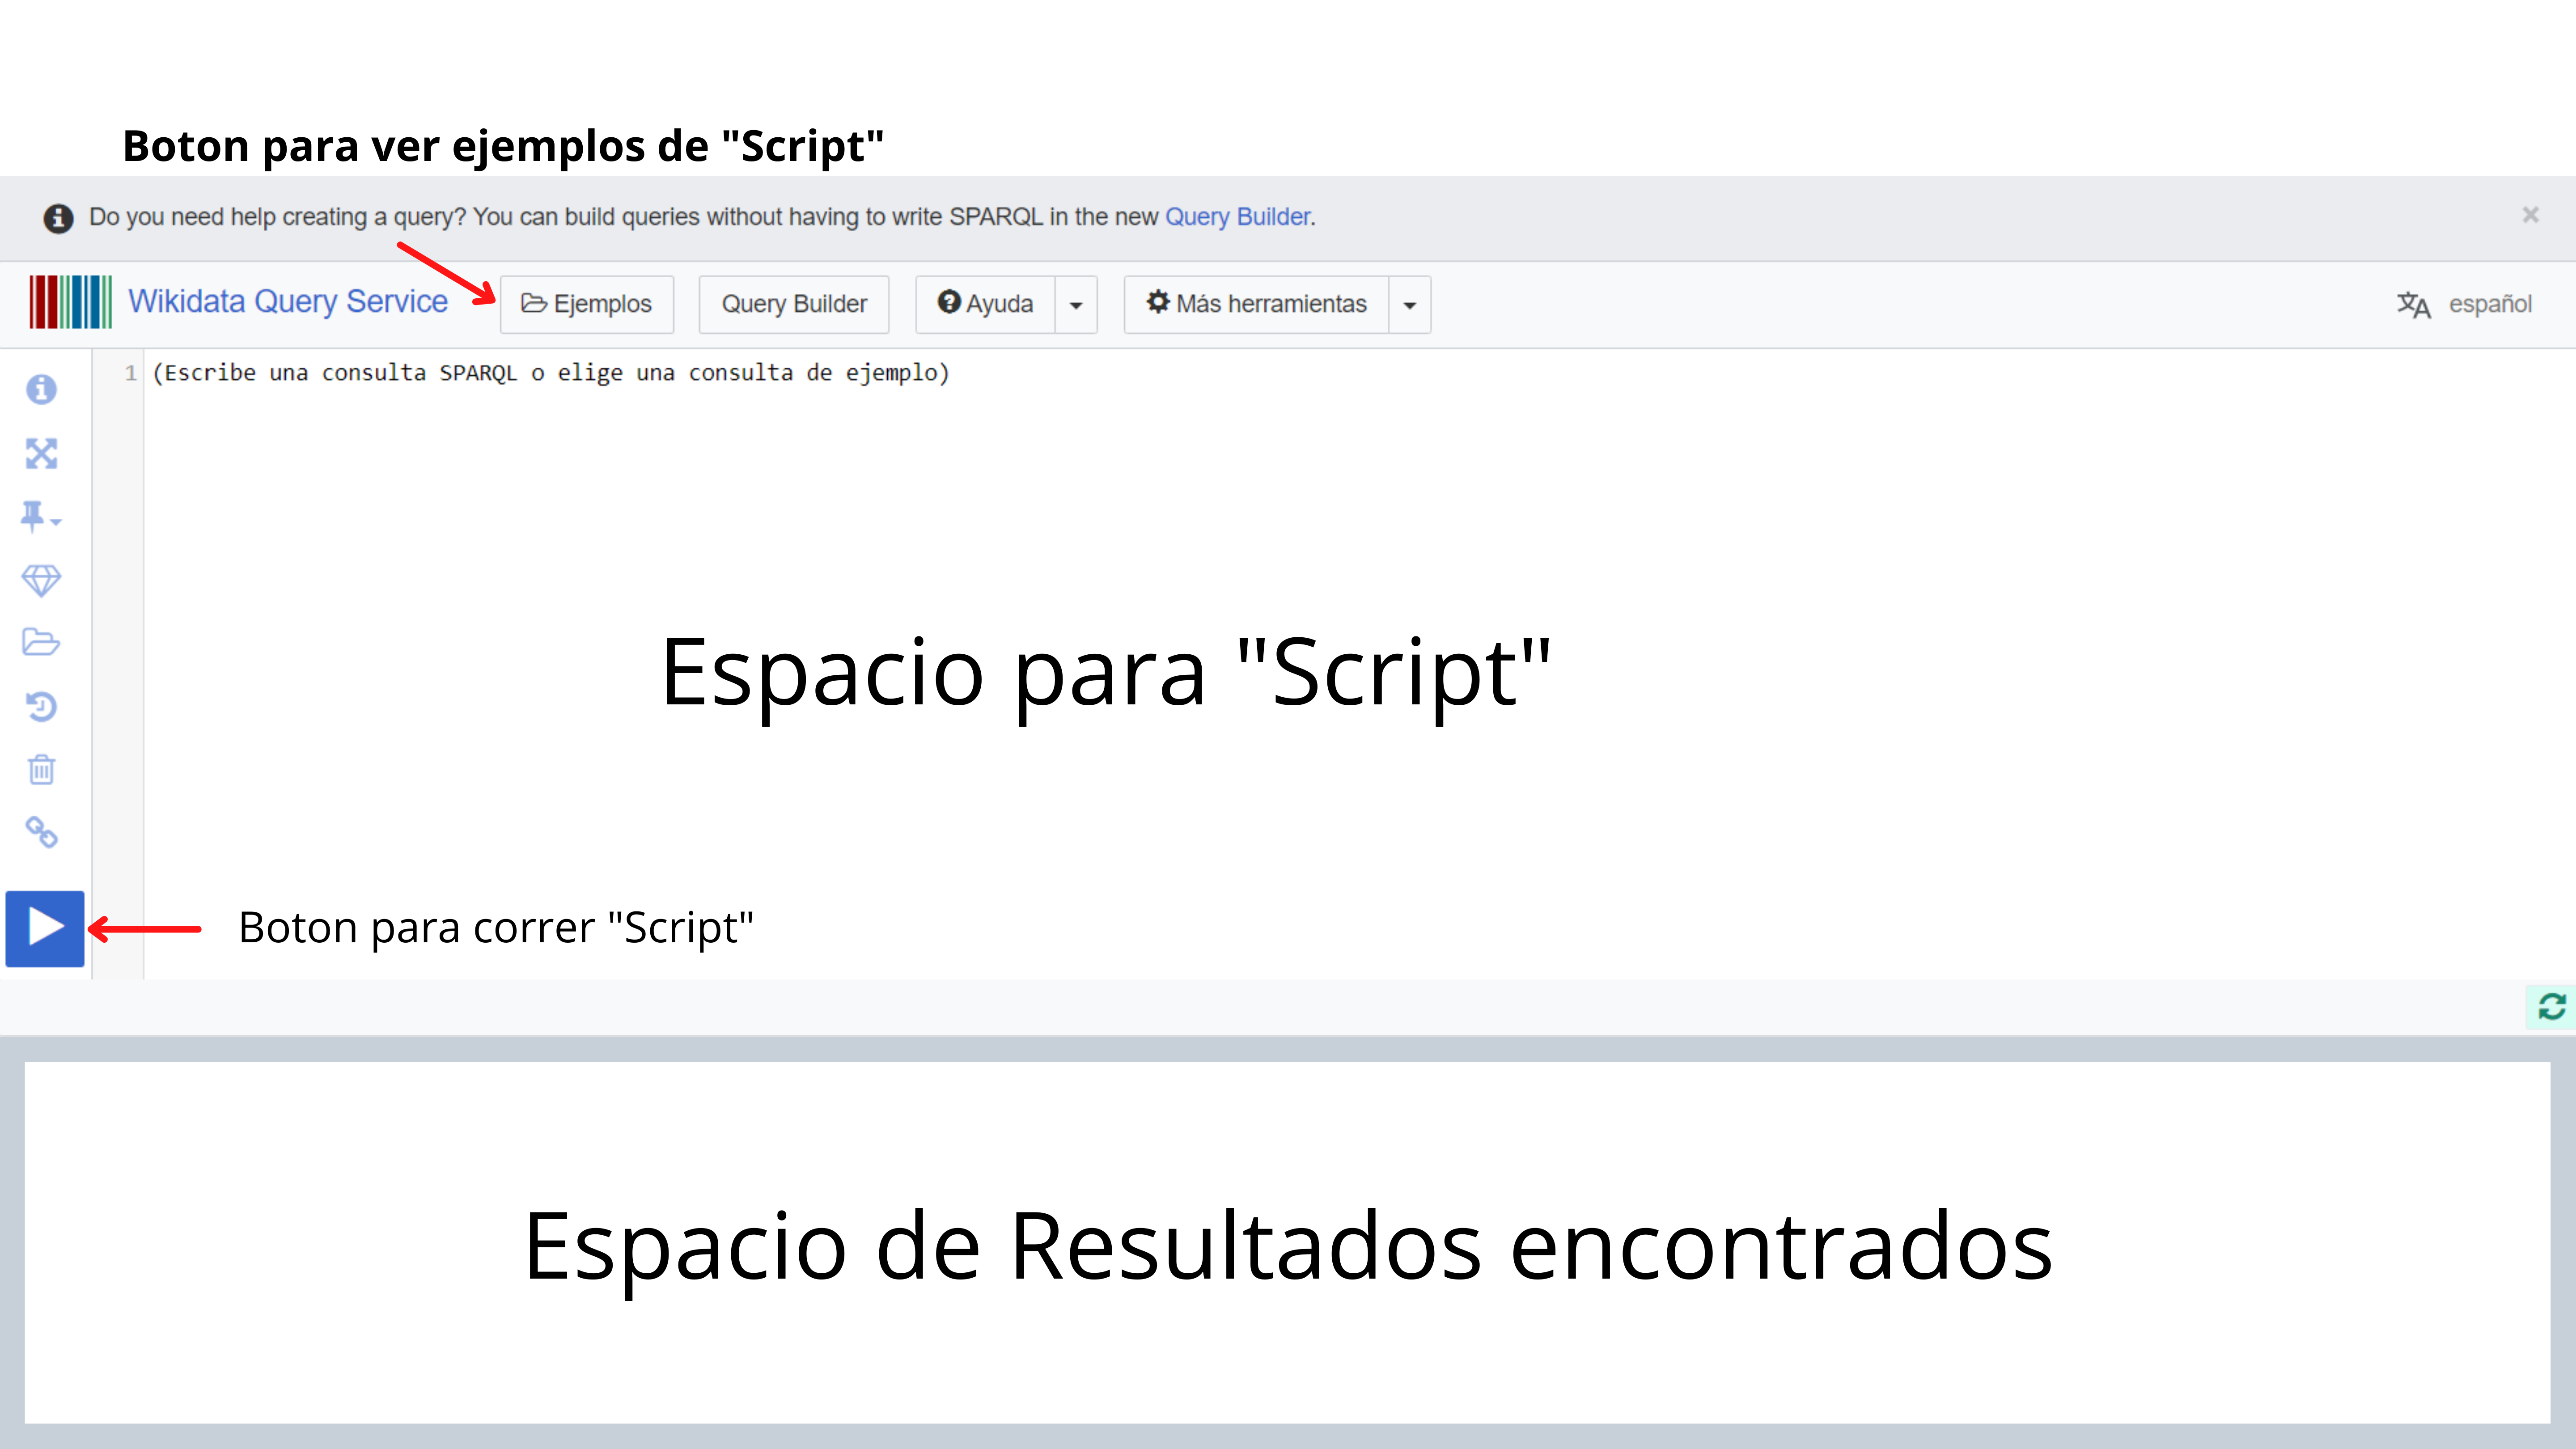

Los resultados de esta consulta podrían incluir, por ejemplo, "limón". En Wikidata, la mayoría de las propiedades son del tipo "tiene", por lo que la consulta podría decir:



```
SELECT ?fruit
WHERE
{
  ?fruit color yellow.
  ?fruit taste sour.
}
```



Para encontrar el identificador de una propiedad, hacemos lo mismo, pero buscamos "P:término de búsqueda" en lugar de solo "término de búsqueda", lo que limita la búsqueda a las propiedades. Esto nos dice que el famoso compositor Johann Sebastian Bach es Q1339, y la propiedad para designar el padre de un ítem es P:P22.

Y por último pero no menos importante, necesitamos incluir prefijos. Para triples WDQS simples, los elementos deben tener el prefijo wd: y las propiedades con wdt:. (Pero esto solo se aplica a valores fijos: ¡las variables no tienen prefijo!)

Juntando esto, llegamos a nuestra primera consulta adecuada de WDQS:



```
SELECT ?child
WHERE
{
# ?child  father   Bach
  ?child wdt:P22 wd:Q1339.
}
```



Ya al menos con este contexto podemos empezar a buscar los identificadores de la informacion correspondiente a tu busqueda en este caso Empresas de Mexico:

https://www.wikidata.org/w/index.php?search=LIST+OF+COMPANIES+MEXICO&title=Special:Search&profile=advanced&fulltext=1&ns0=1&ns120=1

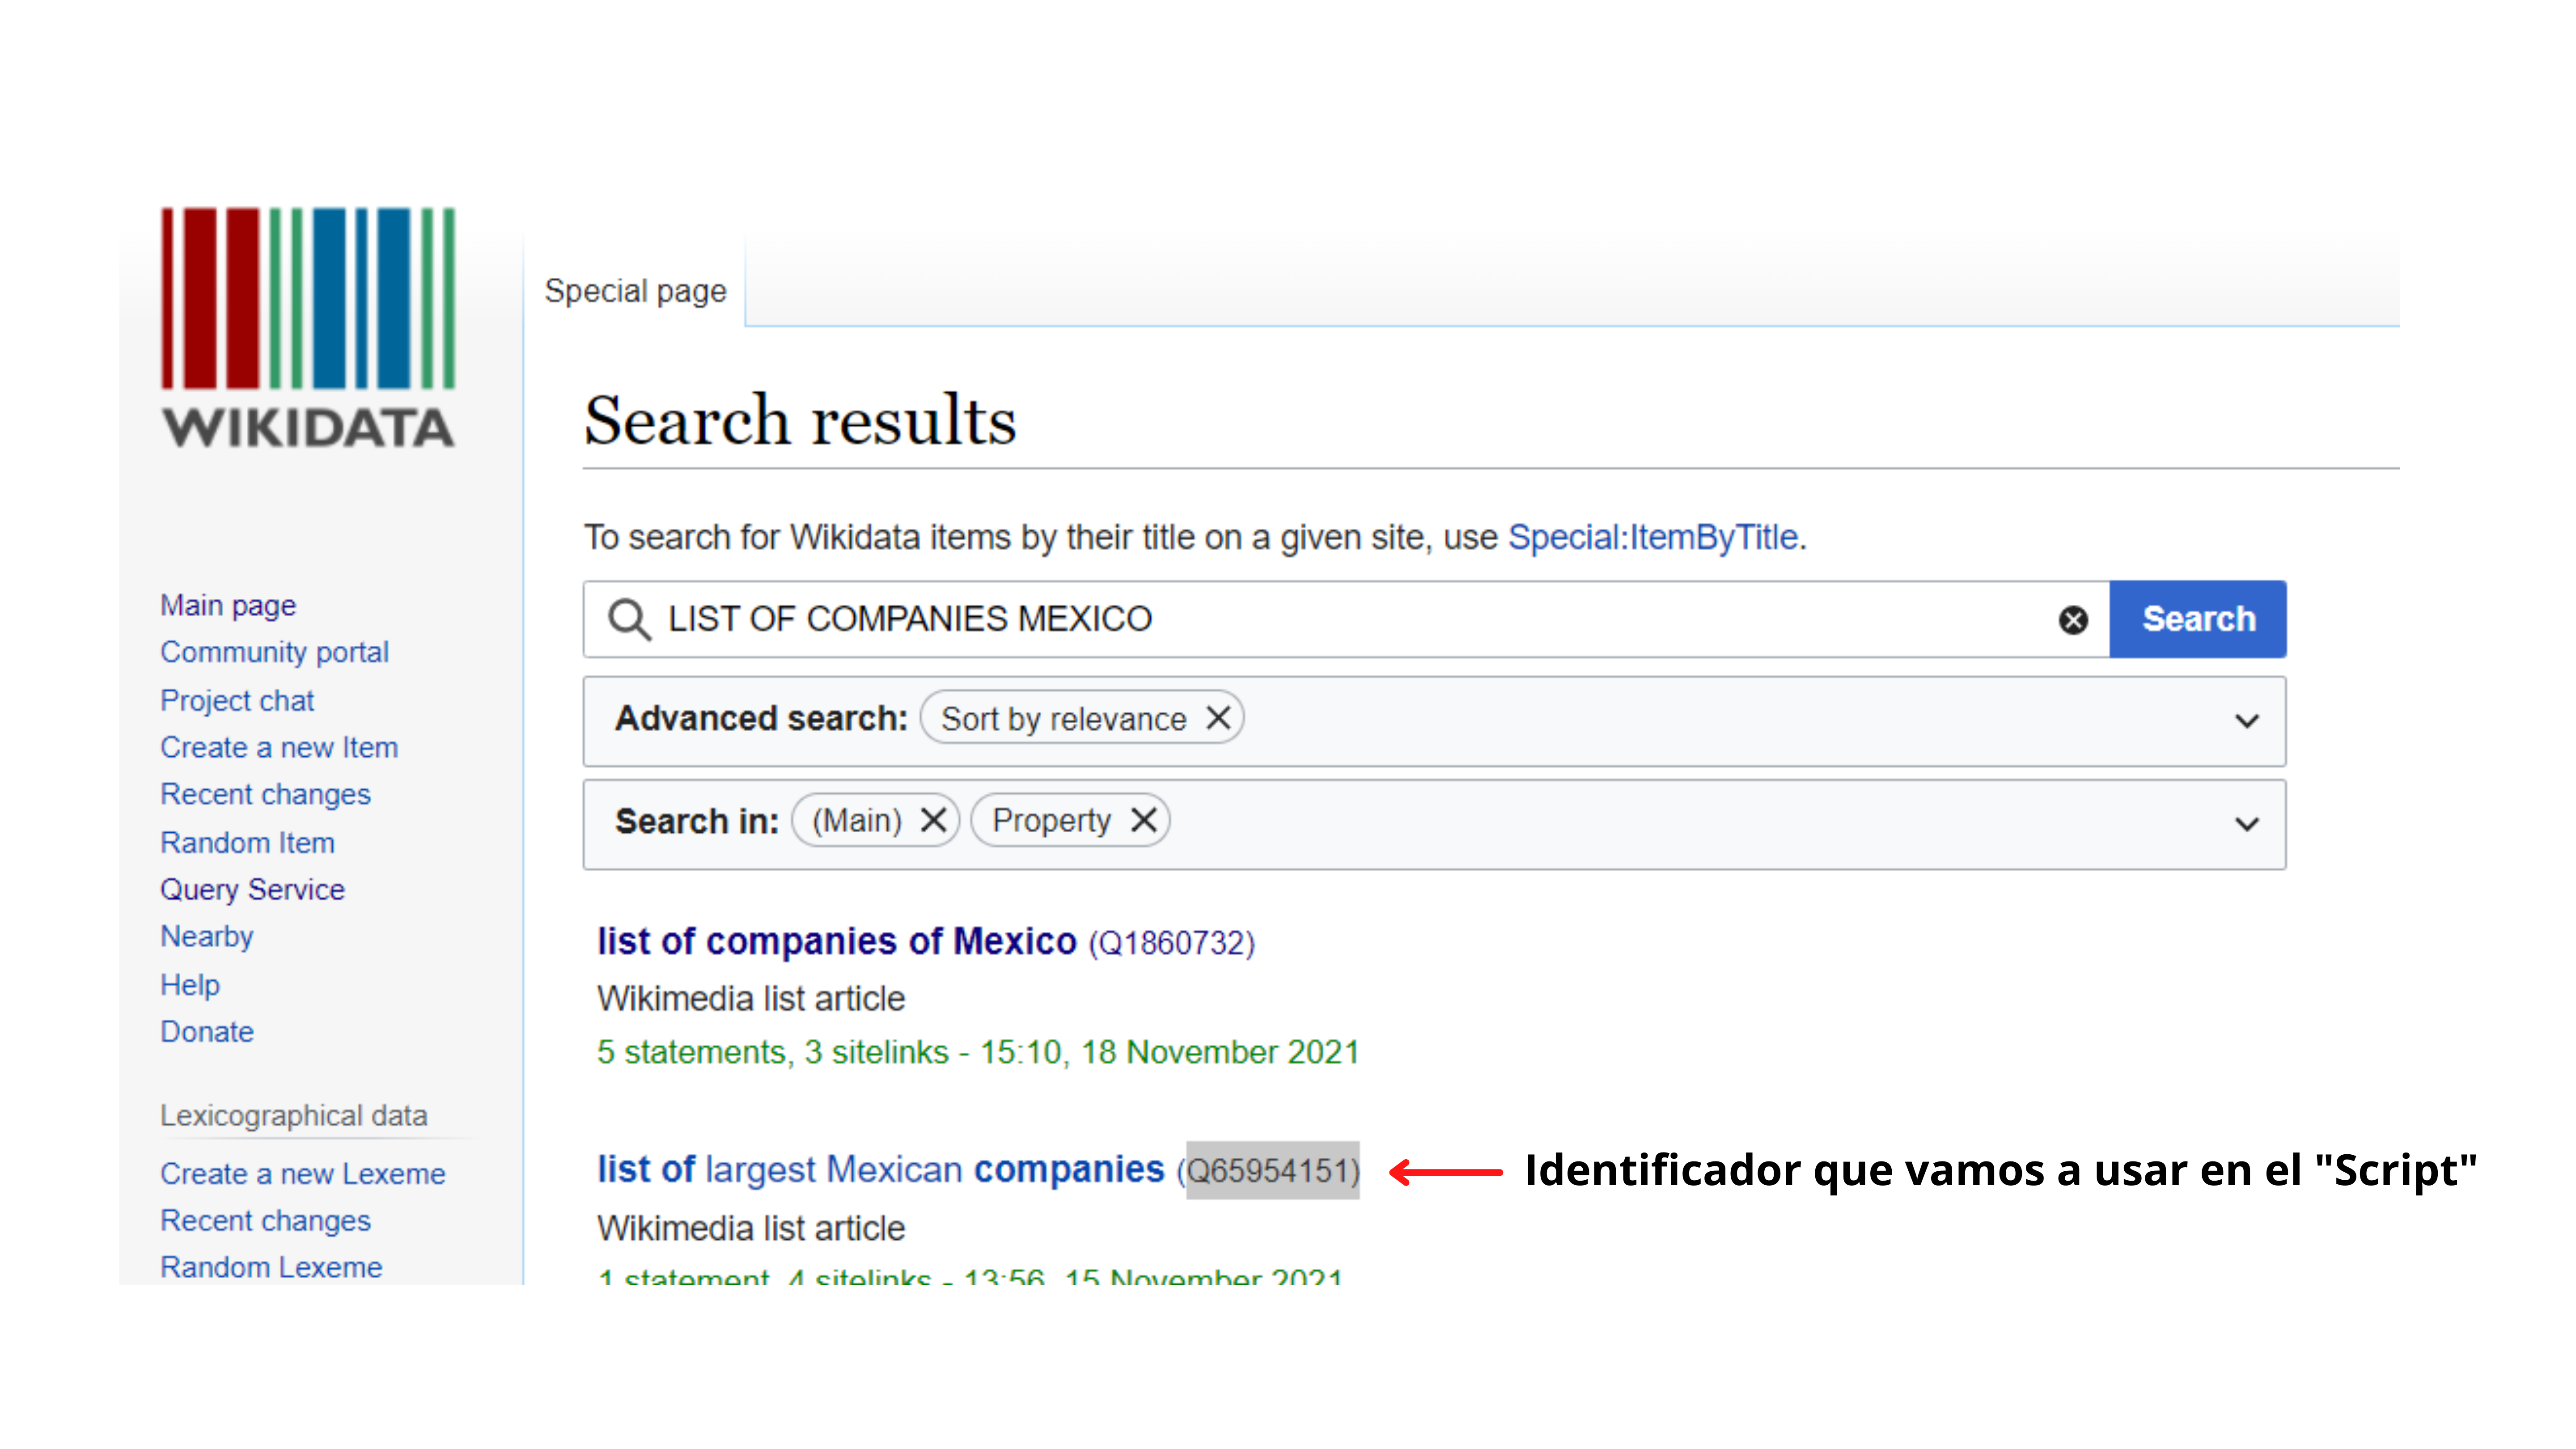

Ahora vamos a ver el "Script" utilizado para encontrar la informacion de empresas


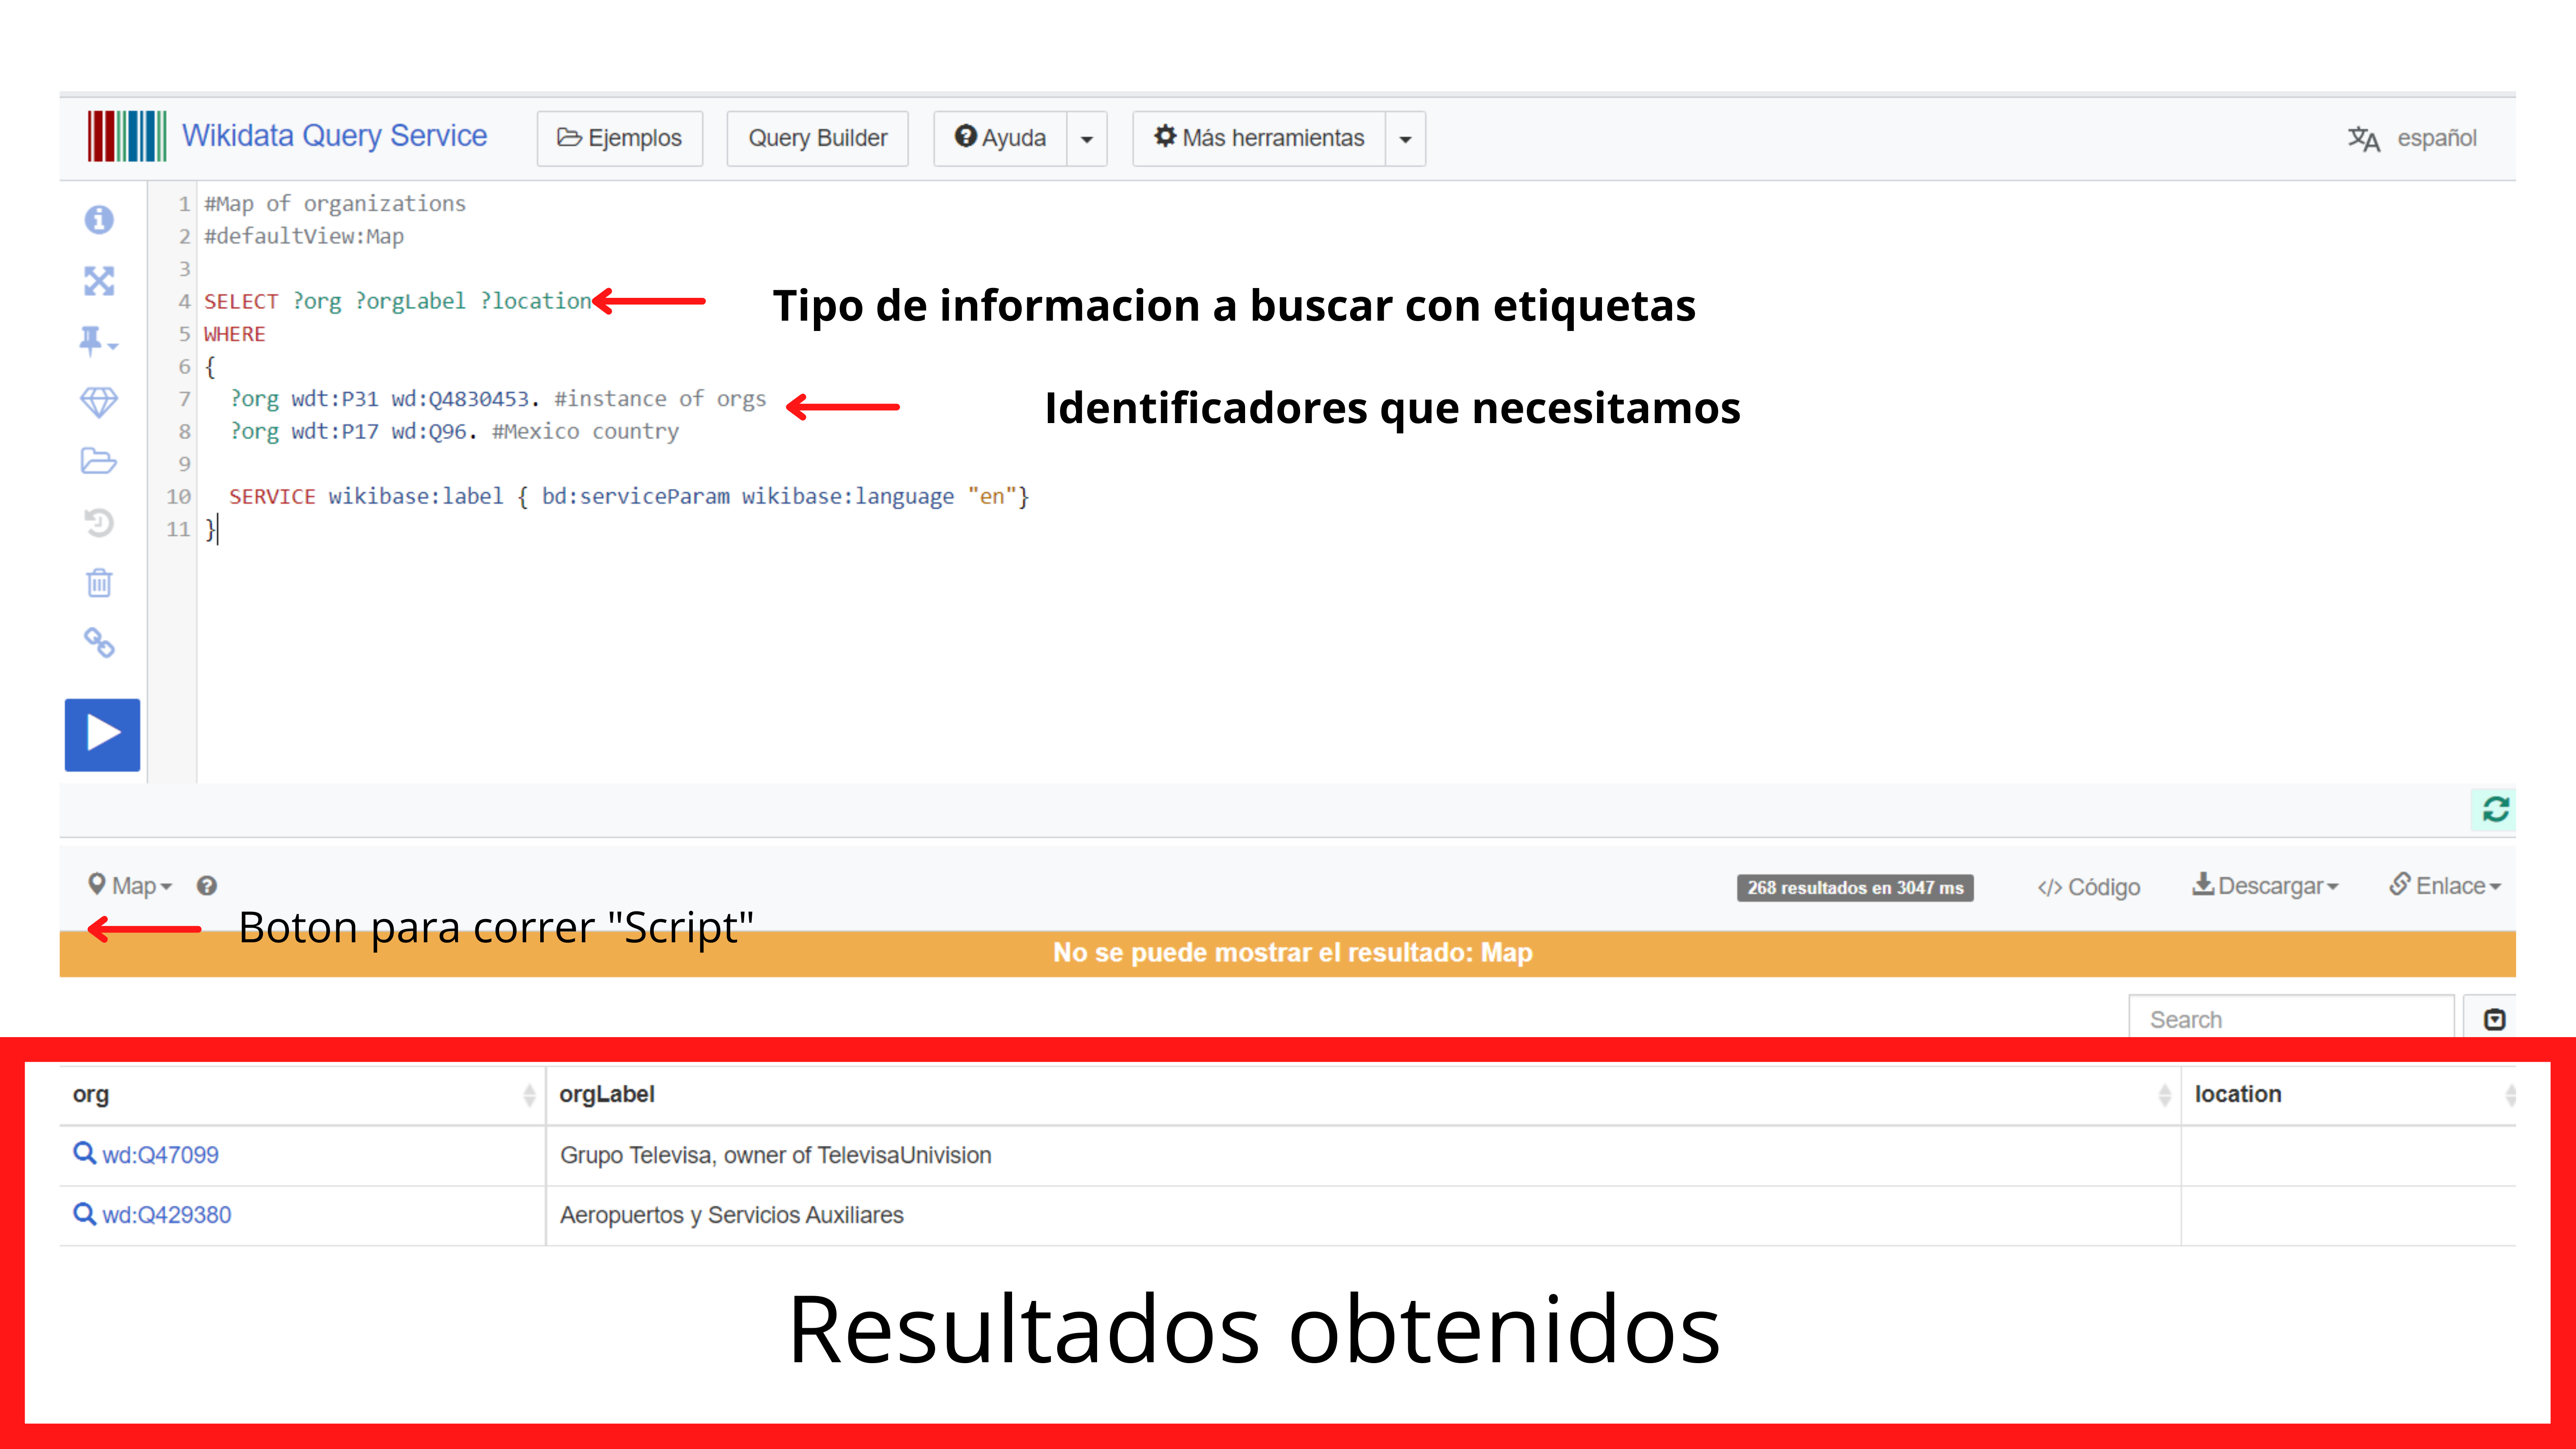

Por ultimo para descargar los resultados en formato que necesitemos damos clic en el menu descargar y tendriamos todo listo

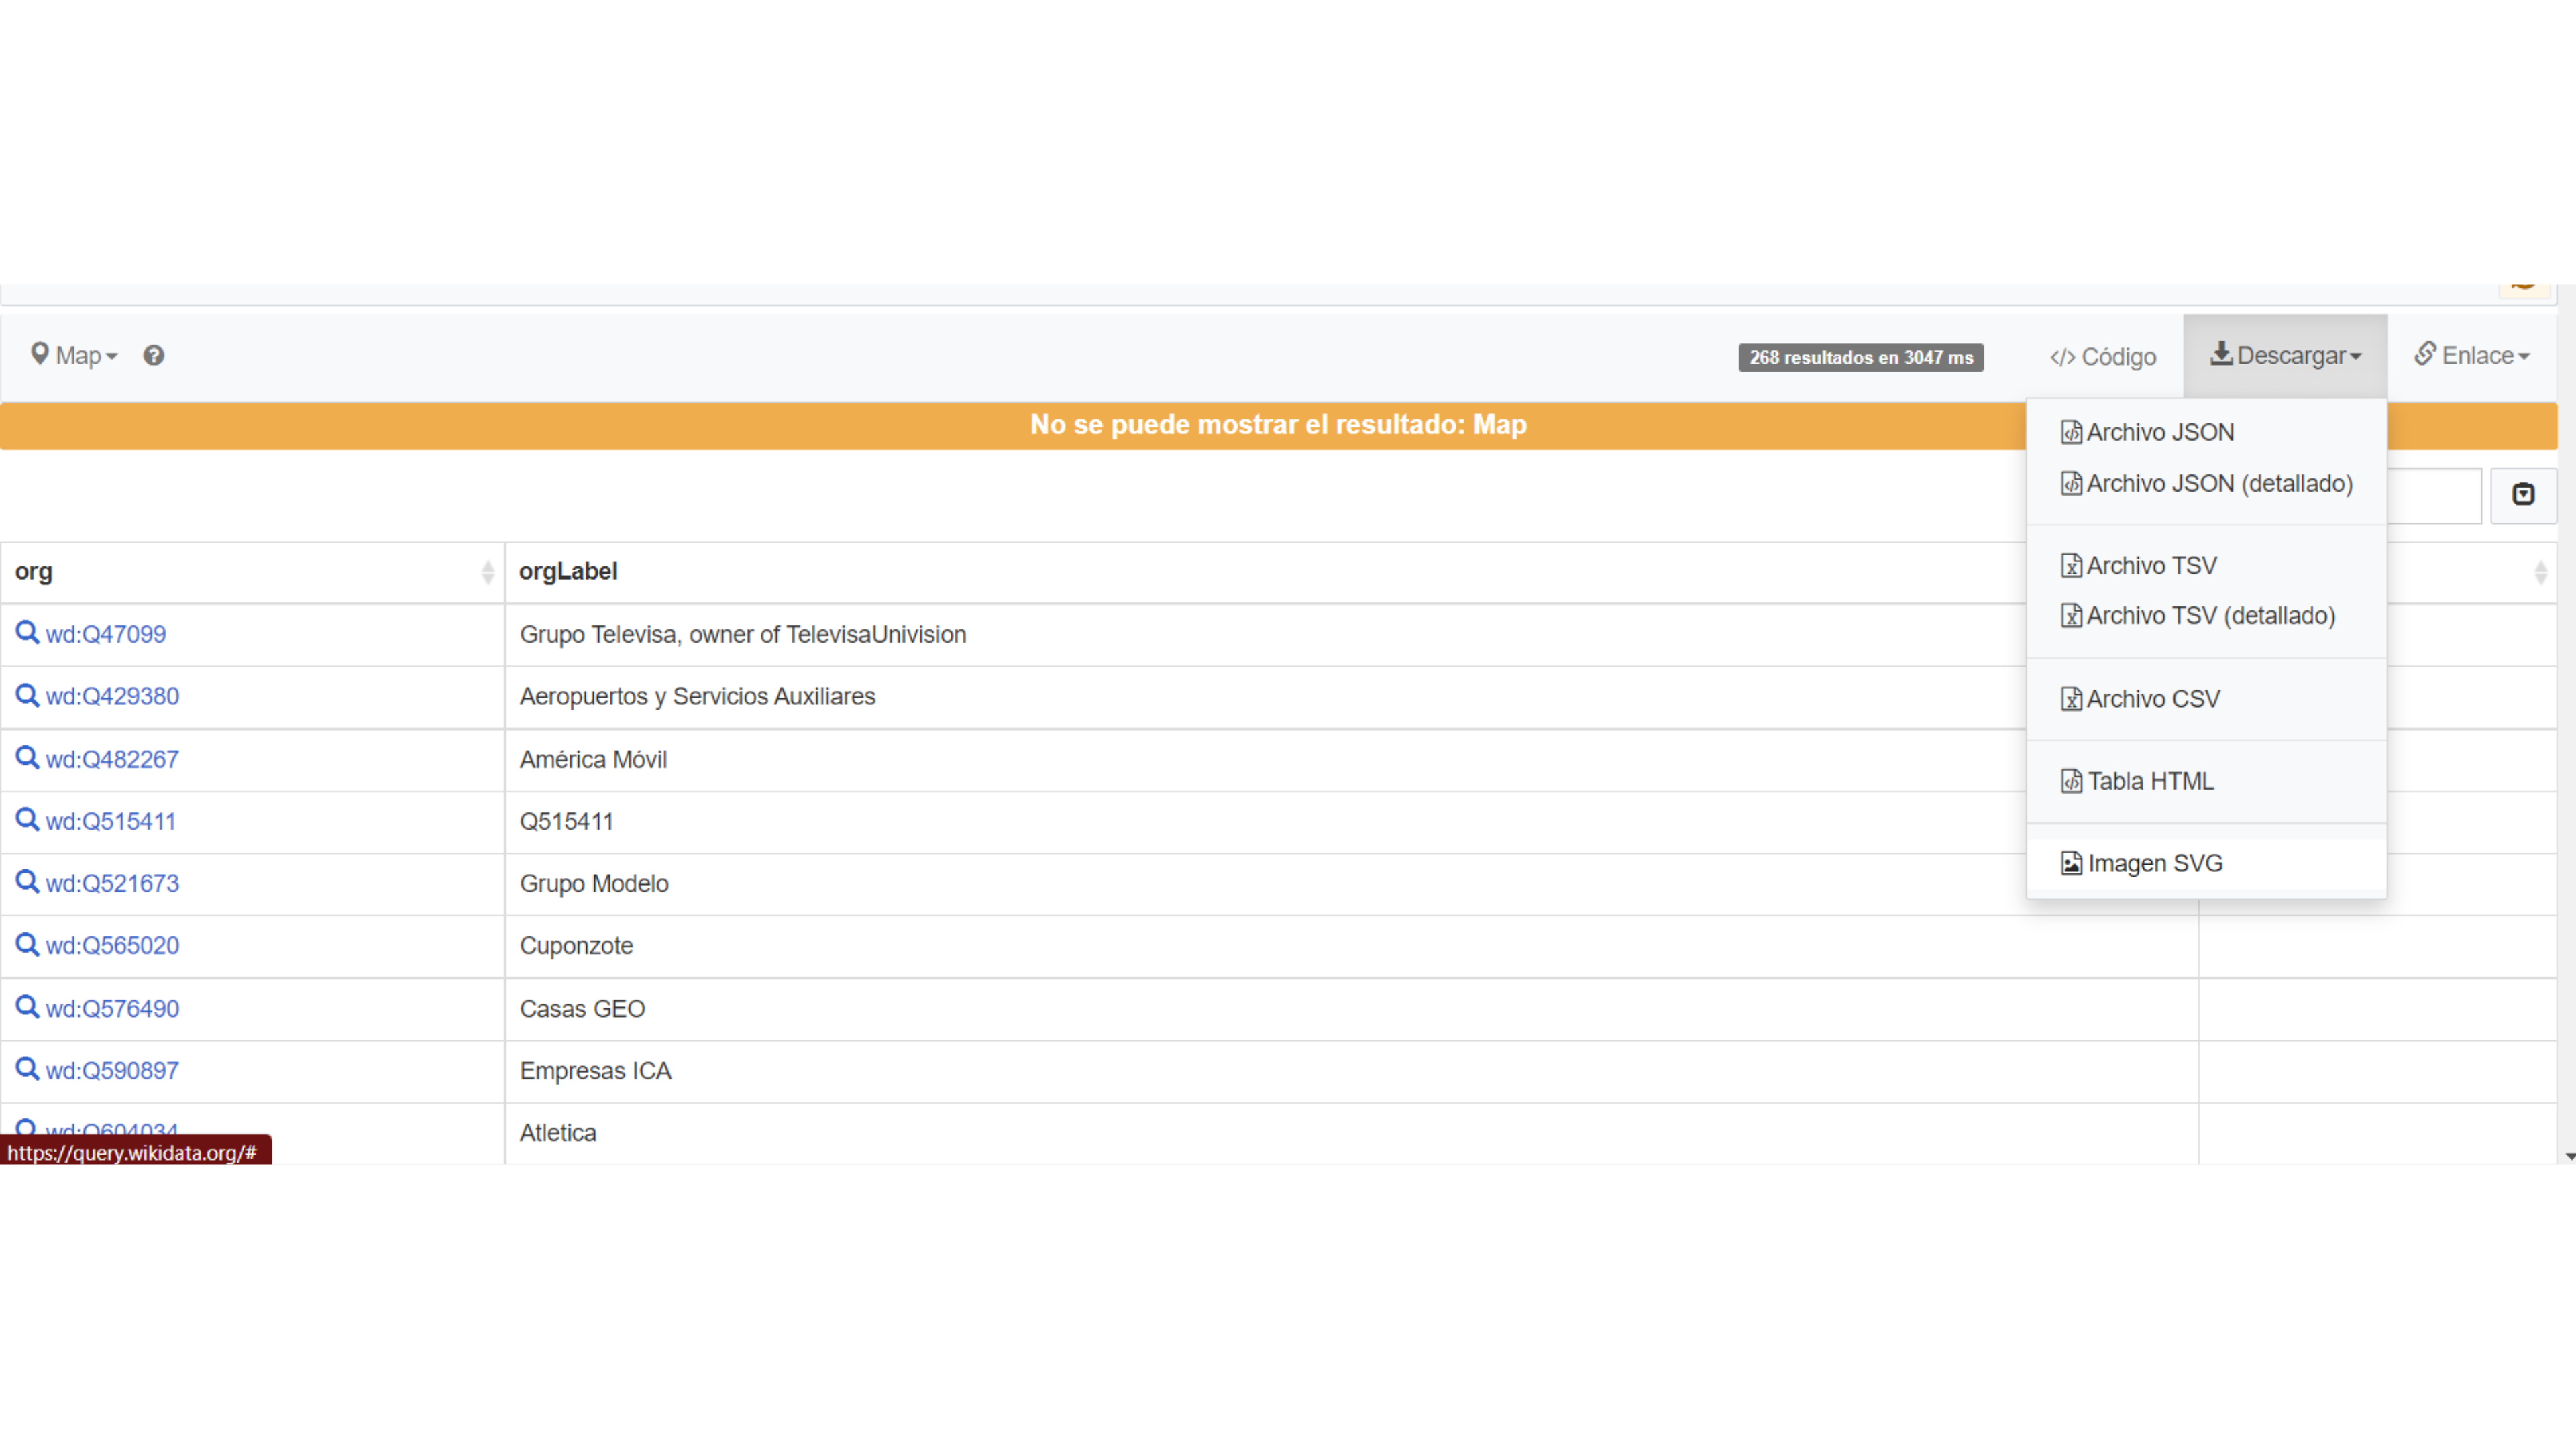

Codigo con mas filtro

```
#Map of organizations 
#defaultView:Map

SELECT ?org ?orgLabel ?location
WHERE
{
  ?org wdt:P31 wd:Q4830453. #instance of orgs
  ?org wdt:P452 ?industry.
  ?org wdt:P17 wd:Q96. #Mexico country

  SERVICE wikibase:label { bd:serviceParam wikibase:language "en"}
}
```



Codigo usado para obtener empresas en Mexico

```
#Map of organizations 
#defaultView:Map

SELECT ?org ?orgLabel ?location
WHERE
{
  ?org wdt:P31 wd:Q4830453. #instance of orgs
  ?org wdt:P17 wd:Q96. #Mexico country

  SERVICE wikibase:label { bd:serviceParam wikibase:language "en"}
}
```



#Codigo Final

In [ ]:
#List of organizations 

SELECT ?org ?orgLabel
WHERE
{
  ?org wdt:P31 wd:Q4830453. #instance of organizations
  ?org wdt:P17 wd:Q96. #Mexico country

  SERVICE wikibase:label { bd:serviceParam wikibase:language "en"}
}

Para poder usar el codigo final en Python ya a en un IDE localmente o en Google Colab podemos utilizar la herramienta que nos proporciona el Query de Wikidata que muestra la siguiente imagen:

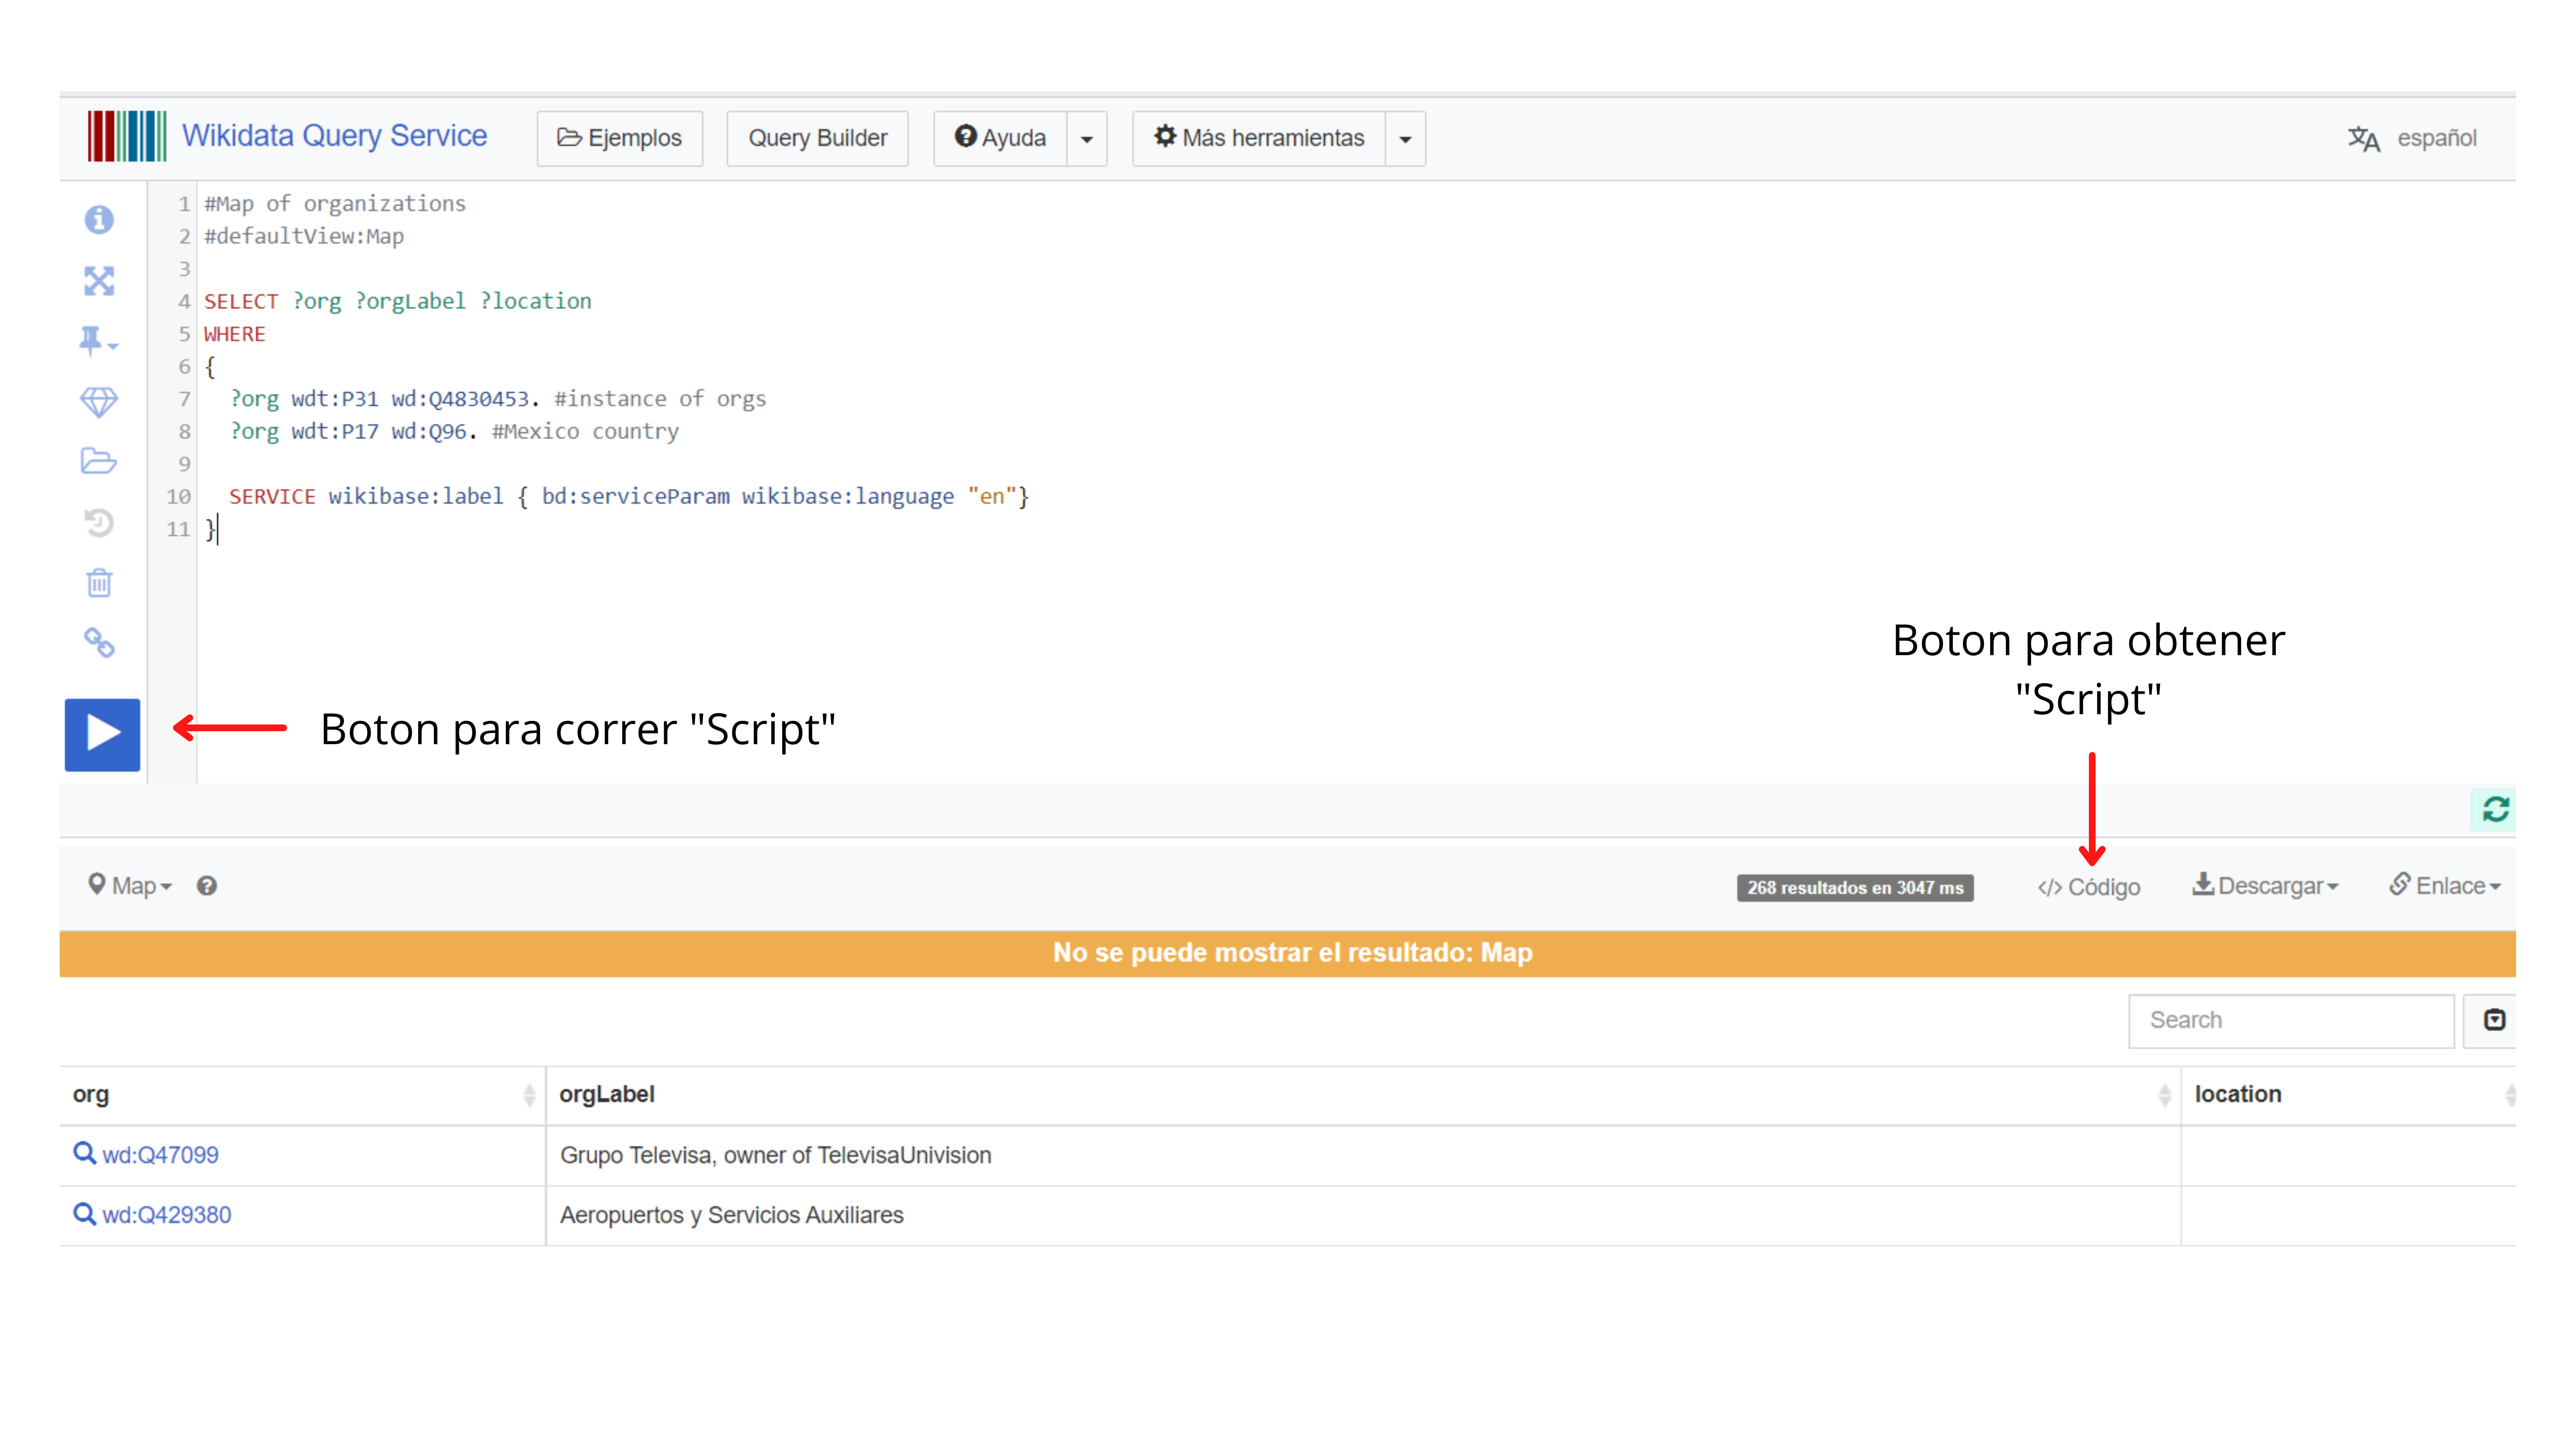

Damos click en el boton Código para abrir la siguiente ventana:

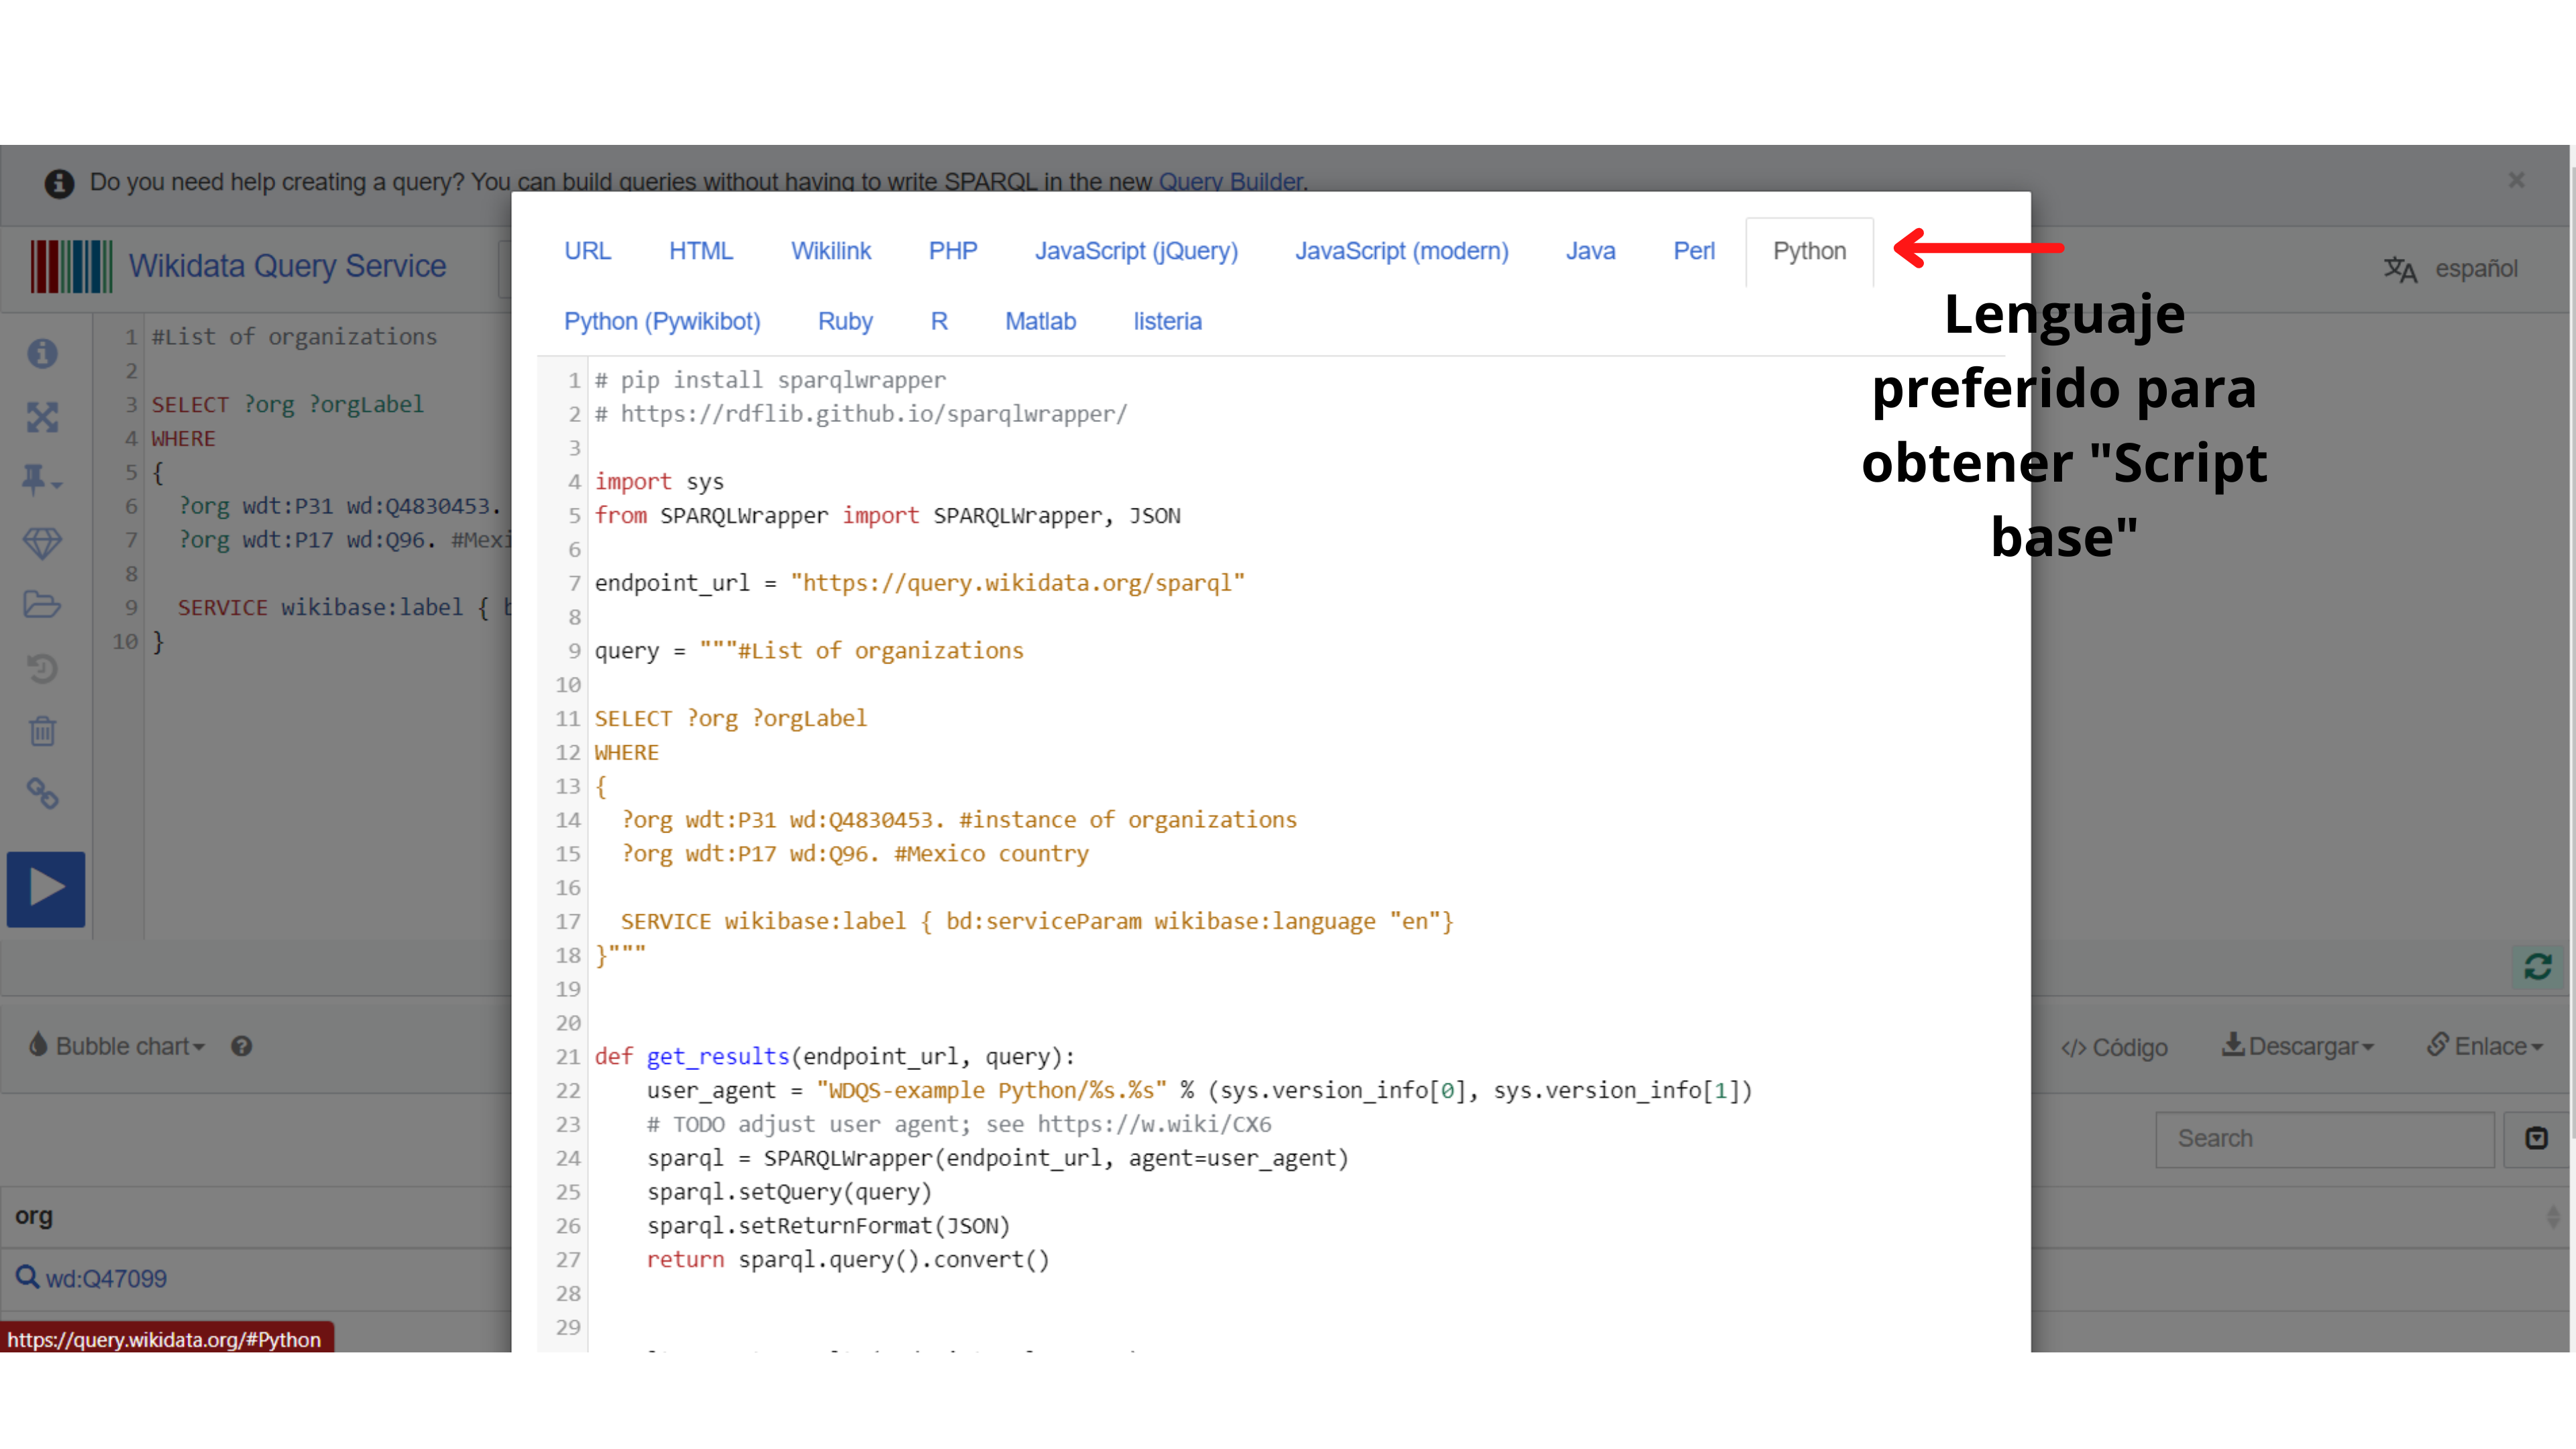

En la ventana podremos utilizar el codigo que nos proporciona para generar los datos y por ultimo nos faltaria complementar el codigo para descargar estos datos en el formato requerido. Aqui podemos ver el codigo descagado para la obtencion de datos sobre las empreas en mexico 

In [2]:
pip install sparqlwrapper

     |████████████████████████████████| 482 kB 5.7 MB/s 
     |████████████████████████████████| 41 kB 483 kB/s 


In [3]:
import sys
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

query = """#List of organizations 

SELECT ?org ?orgLabel
WHERE
{
  ?org wdt:P31 wd:Q4830453. #instance of organizations
  ?org wdt:P17 wd:Q96. #Mexico country

  SERVICE wikibase:label { bd:serviceParam wikibase:language "en"}
}"""


def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
    # TODO adjust user agent; see https://w.wiki/CX6
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()



In [4]:
results = get_results(endpoint_url, query)

for result in results["results"]["bindings"]:
    print(result)

{'org': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q47099'}, 'orgLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'Grupo Televisa, owner of TelevisaUnivision'}}
{'org': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q515411'}, 'orgLabel': {'type': 'literal', 'value': 'Q515411'}}
{'org': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q521673'}, 'orgLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'Grupo Modelo'}}
{'org': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q565020'}, 'orgLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'Cuponzote'}}
{'org': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q576490'}, 'orgLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'Casas GEO'}}
{'org': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q590897'}, 'orgLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'Empresas ICA'}}
{'org': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q604034'}, 'orgLabel': 

Despues de esto podremos agregar la parte faltante del codigo para descargar la informacion en un formato 

In [5]:
Ahora para obtener una lista para poder crear un Archivo CSV

SyntaxError: ignored

In [6]:
#Podemos cambiar el nombre de la variable sin ningun problema
cosas = list(results['results']['bindings'])

In [7]:
print(cosas)

[{'org': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q47099'}, 'orgLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'Grupo Televisa, owner of TelevisaUnivision'}}, {'org': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q515411'}, 'orgLabel': {'type': 'literal', 'value': 'Q515411'}}, {'org': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q521673'}, 'orgLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'Grupo Modelo'}}, {'org': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q565020'}, 'orgLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'Cuponzote'}}, {'org': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q576490'}, 'orgLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'Casas GEO'}}, {'org': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q590897'}, 'orgLabel': {'xml:lang': 'en', 'type': 'literal', 'value': 'Empresas ICA'}}, {'org': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q604034'}, 'orgL

In [8]:
import numpy as np
import pandas as pd

In [9]:
#Creamos una serie
df = pd.DataFrame(cosas)

In [10]:
#Creamos un archivo con la serie 
df.to_csv('list.csv', index=False)

In [11]:
# Leemos el archivo con los datos sin limpiar
data = pd.read_csv('list.csv')

In [12]:
data

org  \
0    {'type': 'uri', 'value': 'http://www.wikidata....   
1    {'type': 'uri', 'value': 'http://www.wikidata....   
2    {'type': 'uri', 'value': 'http://www.wikidata....   
3    {'type': 'uri', 'value': 'http://www.wikidata....   
4    {'type': 'uri', 'value': 'http://www.wikidata....   
..                                                 ...   
263  {'type': 'uri', 'value': 'http://www.wikidata....   
264  {'type': 'uri', 'value': 'http://www.wikidata....   
265  {'type': 'uri', 'value': 'http://www.wikidata....   
266  {'type': 'uri', 'value': 'http://www.wikidata....   
267  {'type': 'uri', 'value': 'http://www.wikidata....   

                                              orgLabel  
0    {'xml:lang': 'en', 'type': 'literal', 'value':...  
1              {'type': 'literal', 'value': 'Q515411'}  
2    {'xml:lang': 'en', 'type': 'literal', 'value':...  
3    {'xml:lang': 'en', 'type': 'literal', 'value':...  
4    {'xml:lang': 'en', 'type': 'literal', 'value':...  
..                                                 ...  
263  {'xml:lang': 'en', 'type': 'literal', 'value':...  
264  {'xml:lang': 'en', 'type': 'literal', 'value':...  
265  {'xml:lang': 'en', 'type': 'literal', 'value':...  
266  {'xml:lang': 'en', 'type': 'literal', 'value':...  
267  {'xml:lang': 'en', 'type': 'literal', 'value':...  

[268 rows x 2 columns]

In [13]:
#dfc = data.head(5).to_dict()

In [14]:
#dfc

{'org': {0: "{'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q47099'}",
  1: "{'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q515411'}",
  2: "{'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q521673'}",
  3: "{'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q565020'}",
  4: "{'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q576490'}"},
 'orgLabel': {0: "{'xml:lang': 'en', 'type': 'literal', 'value': 'Grupo Televisa, owner of TelevisaUnivision'}",
  1: "{'type': 'literal', 'value': 'Q515411'}",
  2: "{'xml:lang': 'en', 'type': 'literal', 'value': 'Grupo Modelo'}",
  3: "{'xml:lang': 'en', 'type': 'literal', 'value': 'Cuponzote'}",
  4: "{'xml:lang': 'en', 'type': 'literal', 'value': 'Casas GEO'}"}}

In [15]:
#dfc['org']

{0: "{'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q47099'}",
 1: "{'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q515411'}",
 2: "{'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q521673'}",
 3: "{'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q565020'}",
 4: "{'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q576490'}"}

In [18]:
#Revisamos que sea un string
type(data.loc[0, 'org'])

str

In [19]:
import ast
#Extramos el valor de el link de wikidata sobre la empresa
data['org'] = data['org'].apply(ast.literal_eval)
data['links'] = data['org'].str['value']
print(data)

                                                   org  \
0    {'type': 'uri', 'value': 'http://www.wikidata....   
1    {'type': 'uri', 'value': 'http://www.wikidata....   
2    {'type': 'uri', 'value': 'http://www.wikidata....   
3    {'type': 'uri', 'value': 'http://www.wikidata....   
4    {'type': 'uri', 'value': 'http://www.wikidata....   
..                                                 ...   
263  {'type': 'uri', 'value': 'http://www.wikidata....   
264  {'type': 'uri', 'value': 'http://www.wikidata....   
265  {'type': 'uri', 'value': 'http://www.wikidata....   
266  {'type': 'uri', 'value': 'http://www.wikidata....   
267  {'type': 'uri', 'value': 'http://www.wikidata....   

                                              orgLabel  \
0    {'xml:lang': 'en', 'type': 'literal', 'value':...   
1              {'type': 'literal', 'value': 'Q515411'}   
2    {'xml:lang': 'en', 'type': 'literal', 'value':...   
3    {'xml:lang': 'en', 'type': 'literal', 'value':...   
4    {'xml:la

In [21]:
#Revisamos las columnas
data

org  \
0    {'type': 'uri', 'value': 'http://www.wikidata....   
1    {'type': 'uri', 'value': 'http://www.wikidata....   
2    {'type': 'uri', 'value': 'http://www.wikidata....   
3    {'type': 'uri', 'value': 'http://www.wikidata....   
4    {'type': 'uri', 'value': 'http://www.wikidata....   
..                                                 ...   
263  {'type': 'uri', 'value': 'http://www.wikidata....   
264  {'type': 'uri', 'value': 'http://www.wikidata....   
265  {'type': 'uri', 'value': 'http://www.wikidata....   
266  {'type': 'uri', 'value': 'http://www.wikidata....   
267  {'type': 'uri', 'value': 'http://www.wikidata....   

                                              orgLabel  \
0    {'xml:lang': 'en', 'type': 'literal', 'value':...   
1              {'type': 'literal', 'value': 'Q515411'}   
2    {'xml:lang': 'en', 'type': 'literal', 'value':...   
3    {'xml:lang': 'en', 'type': 'literal', 'value':...   
4    {'xml:lang': 'en', 'type': 'literal', 'value':...   
..                                                 ...   
263  {'xml:lang': 'en', 'type': 'literal', 'value':...   
264  {'xml:lang': 'en', 'type': 'literal', 'value':...   
265  {'xml:lang': 'en', 'type': 'literal', 'value':...   
266  {'xml:lang': 'en', 'type': 'literal', 'value':...   
267  {'xml:lang': 'en', 'type': 'literal', 'value':...   

                                         links  
0        http://www.wikidata.org/entity/Q47099  
1       http://www.wikidata.org/entity/Q515411  
2       http://www.wikidata.org/entity/Q521673  
3       http://www.wikidata.org/entity/Q565020  
4       http://www.wikidata.org/entity/Q576490  
..                                         ...  
263  http://www.wikidata.org/entity/Q108547811  
264  http://www.wikidata.org/entity/Q108679982  
265  http://www.wikidata.org/entity/Q108757121  
266  http://www.wikidata.org/entity/Q110938496  
267  http://www.wikidata.org/entity/Q110702340  

[268 rows x 3 columns]

In [22]:
#Extramos el valor de el nombre de la empresa en wikidata
data['orgLabel'] = data['orgLabel'].apply(ast.literal_eval)
data['names'] = data['orgLabel'].str['value']
print(data)

                                                   org  \
0    {'type': 'uri', 'value': 'http://www.wikidata....   
1    {'type': 'uri', 'value': 'http://www.wikidata....   
2    {'type': 'uri', 'value': 'http://www.wikidata....   
3    {'type': 'uri', 'value': 'http://www.wikidata....   
4    {'type': 'uri', 'value': 'http://www.wikidata....   
..                                                 ...   
263  {'type': 'uri', 'value': 'http://www.wikidata....   
264  {'type': 'uri', 'value': 'http://www.wikidata....   
265  {'type': 'uri', 'value': 'http://www.wikidata....   
266  {'type': 'uri', 'value': 'http://www.wikidata....   
267  {'type': 'uri', 'value': 'http://www.wikidata....   

                                              orgLabel  \
0    {'xml:lang': 'en', 'type': 'literal', 'value':...   
1              {'type': 'literal', 'value': 'Q515411'}   
2    {'xml:lang': 'en', 'type': 'literal', 'value':...   
3    {'xml:lang': 'en', 'type': 'literal', 'value':...   
4    {'xml:la

In [23]:
data

org  \
0    {'type': 'uri', 'value': 'http://www.wikidata....   
1    {'type': 'uri', 'value': 'http://www.wikidata....   
2    {'type': 'uri', 'value': 'http://www.wikidata....   
3    {'type': 'uri', 'value': 'http://www.wikidata....   
4    {'type': 'uri', 'value': 'http://www.wikidata....   
..                                                 ...   
263  {'type': 'uri', 'value': 'http://www.wikidata....   
264  {'type': 'uri', 'value': 'http://www.wikidata....   
265  {'type': 'uri', 'value': 'http://www.wikidata....   
266  {'type': 'uri', 'value': 'http://www.wikidata....   
267  {'type': 'uri', 'value': 'http://www.wikidata....   

                                              orgLabel  \
0    {'xml:lang': 'en', 'type': 'literal', 'value':...   
1              {'type': 'literal', 'value': 'Q515411'}   
2    {'xml:lang': 'en', 'type': 'literal', 'value':...   
3    {'xml:lang': 'en', 'type': 'literal', 'value':...   
4    {'xml:lang': 'en', 'type': 'literal', 'value':...   
..                                                 ...   
263  {'xml:lang': 'en', 'type': 'literal', 'value':...   
264  {'xml:lang': 'en', 'type': 'literal', 'value':...   
265  {'xml:lang': 'en', 'type': 'literal', 'value':...   
266  {'xml:lang': 'en', 'type': 'literal', 'value':...   
267  {'xml:lang': 'en', 'type': 'literal', 'value':...   

                                         links  \
0        http://www.wikidata.org/entity/Q47099   
1       http://www.wikidata.org/entity/Q515411   
2       http://www.wikidata.org/entity/Q521673   
3       http://www.wikidata.org/entity/Q565020   
4       http://www.wikidata.org/entity/Q576490   
..                                         ...   
263  http://www.wikidata.org/entity/Q108547811   
264  http://www.wikidata.org/entity/Q108679982   
265  http://www.wikidata.org/entity/Q108757121   
266  http://www.wikidata.org/entity/Q110938496   
267  http://www.wikidata.org/entity/Q110702340   

                                          names  
0    Grupo Televisa, owner of TelevisaUnivision  
1                                       Q515411  
2                                  Grupo Modelo  
3                                     Cuponzote  
4                                     Casas GEO  
..                                          ...  
263                                      YIPARD  
264                             Jardin de Greta  
265                                      Owlify  
266                                       Kavak  
267                                  Sushi Roll  

[268 rows x 4 columns]

In [27]:
#Creamos una variable con las columnas que contienen los datos limpios
datatocsv = data[['names','links']]

In [25]:
#Revisamos las columnas
datatocsv

names  \
0    Grupo Televisa, owner of TelevisaUnivision   
1                                       Q515411   
2                                  Grupo Modelo   
3                                     Cuponzote   
4                                     Casas GEO   
..                                          ...   
263                                      YIPARD   
264                             Jardin de Greta   
265                                      Owlify   
266                                       Kavak   
267                                  Sushi Roll   

                                         links  
0        http://www.wikidata.org/entity/Q47099  
1       http://www.wikidata.org/entity/Q515411  
2       http://www.wikidata.org/entity/Q521673  
3       http://www.wikidata.org/entity/Q565020  
4       http://www.wikidata.org/entity/Q576490  
..                                         ...  
263  http://www.wikidata.org/entity/Q108547811  
264  http://www.wikidata.org/entity/Q108679982  
265  http://www.wikidata.org/entity/Q108757121  
266  http://www.wikidata.org/entity/Q110938496  
267  http://www.wikidata.org/entity/Q110702340  

[268 rows x 2 columns]

In [26]:
#Por ultimo creamos nuestro archivo para descargar el archivo que contiene la informacion
#despues de darle una limpieza
datatocsv.to_csv('wikidata.csv', index=False)

Para mas informacion: 
https://www.wikidata.org/wiki/Wikidata:SPARQL_tutorial

Y mas sobre empresas:

https://en.wikiversity.org/wiki/Research_in_programming_Wikidata/Business_enterprise

Para saber mas sobre los identificadores:

https://www.wikidata.org/wiki/Q3169632


https://www.wikidata.org/wiki/Wikidata:SPARQL_query_service/queries/examples